# District Heating: An Investigation into the Efficiency of a Centralized Heating System
#### Thermodynamics, Final Project  |  Karen Hinh, Mads Young
District heating is a method of home climate control that should be more utilized in the future due to its energy efficiency and friendliness to more sustainable energy sources. For heat sources, there’s geothermal or water source heat pumps, as well as gas or electric boilers, but for the purposes of this project, we are going to focus on exploring the differences between water source heat pumps and gas / electric boilers.

In this project, we will investigate the efficiencies of a small scale district heating network with different heat sources (water source heat pumps and gas / electric boilers) and mediums of heat transfer (liquid water vs steam). If there’s extra time, we would be interested in exploring the efficiency difference between small scale district heating with decentralized heating in houses. 

To accomplish this, we will build a thermodynamic model of a small scale district heating network with variables such as the amount of heat put in, the initial and final (after heat extraction) temperature of the fluid and pressure differences within the heat pump. We will use the model to compare energy cost, thermodynamic properties, and efficiency of the relevant heating methods to ideally prove the superiority of district heating networks over decentralized heating. This will be done in coolprop.

In [85]:
import CoolProp.CoolProp as CP
import CoolProp.Plots as CPP
import numpy as np
import matplotlib.pyplot as plt

# Simplified Model

![](final_system_diagram.png)

## Defining State Variables

In [86]:
# source: https://www.achrnews.com/articles/92875-the-essentials-of-working-with-r-410a#:~:text=A%20normally%20operating%20R%2D410A,side%20pressure%20of%20130%20psig.

T1 = 2 + 273.15 # K
T2 = 48.88 + 273.15 # K
T3 = 30 + 273.15 # K
T4 = T1

P1 = 896 * 1000 # Pa
P2 = 2882 * 1000 # Pa
P3 = 200 *1000 # Pa
P4 = 700 *1000 # Pa

# source: source: https://www.iosrjournals.org/iosr-jmce/papers/RDME-Volume4/RDME-34.pdf

ma = np.array([32,44]) / 3600 # kg/s, varied
print(ma)

[0.00888889 0.01222222]


In [87]:
substance = 'R410a'

# Enthalpy calculations
h1 = CP.PropsSI('H', 'T',T1, 'P',P1, substance) # vapor, J/kg
h2 = CP.PropsSI('H', 'T',T2, 'P',P2, substance) # vapor, J/kg
h3 = CP.PropsSI('H', 'T',T3, 'P',P3, substance) # liquid, J/kg
h4 = 213.2942 * 1000 # vapor-liquid, J/kg

print(h1, h2, h3, h4,)

203047.24939138844 426390.5301947168 462422.6793225789 213294.19999999998


In [88]:
# m = 6.8 # kg, of water
# c = 1.8 # J/kg-C, of water
# deltaT = np.array([5,10]) / 3600 # J, temperature difference between water and refrigerant

# T1 = 12.8 + 273.15 # K
# T2 = 70 + 273.15 # K
# T3 = 60 + 273.15 # K
# T4 = 12.8 + 273.15 # K
# ##T5 = T1
# ##T6 = T1

In [89]:
# substance = 'R410a'

# # Enthalpy calculations
# h1 = CP.PropsSI('H', 'T',T1, 'Q',1, substance) / 1000 # vapor, kJ/kg
# h2 = CP.PropsSI('H', 'T',T2, 'Q',1, substance) / 1000 # vapor, kJ/kg
# h3 = CP.PropsSI('H', 'T',T3, 'Q',0, substance) / 1000 # liquid, 251.13 kJ/kg
# h4 = 205.6184 # vapor-liquid, kJ/kg

# print(h1, h2, h3, h4,)

In [90]:
# Calculate mass fraction
# mg # mass of vapor
# mf # mass of liquid
# x = mg / (mg + mf)

## Q56: Heat Transfer into the Evaporator (Qc)

In [91]:
# Q41 = m*c*deltaT # W
Q41 = ma * (h1 - h4) # W

Q41

array([ -91.08400541, -125.24050744])

In [92]:
# m_flowrate = Q41 / (h1 - h4) # kg/s

# m_flowrate

## Q23: Heat Transfer out of the Condensor (Qh)

In [93]:
Q23 = ma * (h2 - h3)  # W

Q23

array([-320.28577003, -440.39293378])

## W12: Work into Compressor (Win)

In [94]:
W12 = ma * (h1 - h2) # W

print('The work input to this heat pump ranges from: ' + str(-W12[0]) + ' W to ' + str(-W12[1]) + ' W')

The work input to this heat pump ranges from: 1985.2736071406966 W to 2729.751209818458 W


## COP

In [95]:
COP = Q23 / W12 # Qh/Win

print('The COP of this heat pump cycle is: ' + str(COP[0]))

The COP of this heat pump cycle is: 0.1613307953490271


## Heat Exchanger
Sources:
- https://www.engineeringtoolbox.com/arithmetic-logarithmic-mean-temperature-d_436.html
- https://www.engineeringtoolbox.com/overall-heat-transfer-coefficient-d_434.html
- https://www.engineeringtoolbox.com/heat-transfer-coefficients-exchangers-d_450.html
- https://www.pdhonline.com/courses/m371/m371content.pdf

In [96]:
## h = 400 # W/m2-K, cooling of water by air --> compare to stainless steel / wall thickness (thermal conductivity)
## A = 1 # m2, random assumption

## LMT = Q23 / (h*A) # K
r_pipe = 0.04 # m
h_pipe = 1 # m --> modify length of pipes, add heat losses
v_water = 3.1415 * r_pipe**2 * h_pipe # m3
rho = 997 # kg/m3
m_water = v_water * rho
c_water = 4184 # J/KgK

dT_water = -Q23 / (ma * c_water) # Q23 is negative because it is entering the water

# typical range: 1-10 K for LMT

dT_water

array([8.61189033, 8.61189033])

# LMTD

dT_loop = np.array([39.9999999999, 39.9999999]) # C
T2 = 48.88 + 273.15 # K
T3 = 30 + 273.15 # K

tpi = T2 # K primary inlet temp, hot, 48 C
tpo = T3 # K primary outlet temp, cold, 30 C
tso = 70 + 273.15 # K secondary outlet temp, hot
tsi = tso-dT_loop # K secondary inlet temp, cold

# For counter flow:
dt_i = tpi - tso # inlet primary and outlet secondary fluid temp difference -- 48-50 = -2
dt_o = tpo - tsi # outlet primary and inlet secondary fluid temp difference -- 30-(30/25) = 0 or 5

LMT = (dt_o - dt_i) / (np.log(dt_o / dt_i))

print(LMT)

## Plot

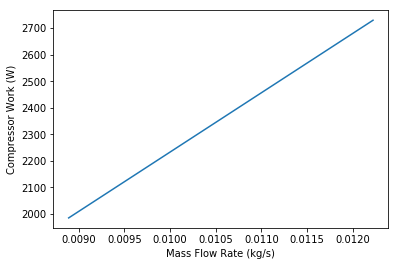

In [97]:
plt.plot(ma, -W12)
plt.xlabel("Mass Flow Rate (kg/s)")
plt.ylabel("Compressor Work (W)")
plt.show()

### Modified LMT with variables

In [147]:
# Base Case
hot_temp = 70 # C

T1 = hot_temp - dT_water

r_pipe = 0.04 # m
h_pipe = 20 # m --> modify length of pipes, add heat losses
k = .005  # W/m*K heat loss coefficient
soiltemp = 35 #C
hl = h_pipe * k * ((hot_temp+273.15) + (T1+273.15) - 2*(soiltemp+273.15)) #W, watts lost
heatloss = hl / c_water

v_water = 3.1415 * r_pipe**2 * h_pipe # m3
rho = 997 # kg/m3
m_water = v_water * rho

cold_temp = (T1) - heatloss # C

cold_temp

print(hot_temp, cold_temp)

70 [61.38664246 61.38664246]


In [148]:
T2 = 48.88 + 273.15 # K
T3 = 30 + 273.15 # K

tpi = T2 # K primary inlet temp, hot, 48 C
tpo = T3 # K primary outlet temp, cold, 30 C
tso = hot_temp + 273.15 # K secondary outlet temp, hot
tsi = cold_temp + 273.15 # K secondary inlet temp, cold

# For counter flow:
dt_i = tpi - tso # inlet primary and outlet secondary fluid temp difference -- 48-50 = -2
dt_o = tpo - tsi # outlet primary and inlet secondary fluid temp difference -- 30-(30/25) = 0 or 5

LMT = (dt_o - dt_i) / (np.log(dt_o / dt_i))

print(LMT)

[-25.91526675 -25.91526675]


In [149]:
dt_loop =  hot_temp - cold_temp
print(dt_loop)
Q = 0.03 * c_water * dt_loop

[8.61335754 8.61335754]


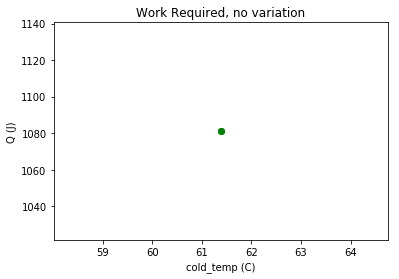

In [150]:
plt.plot(cold_temp, Q,color='green', marker='o')
plt.xlabel("cold_temp (C)")
plt.ylabel("Q (J)")
plt.title("Work Required, no variation")
plt.show()

In [132]:
# House Heat Demand
hot_temp = 70 # C

dT_h1 = np.array([-30, -10]) # C
dT_h2 = np.array([-30, -10]) # C
dT_h3 = np.array([-30, -10]) # C

T1 = hot_temp + dT_h1
T2 = hot_temp + dT_h2
T3 = hot_temp + dT_h3

r_pipe = 0.04 # m
h_pipe = 20 # m --> modify length of pipes, add heat losses
k = .005  # W/m*K heat loss coefficient
soiltemp = 35 #C
hl = h_pipe * k * ((hot_temp+273.15) + (T1+273.15) - 2*(soiltemp+273.15)) #W, watts lost
heatloss = hl / 4168

v_water = 3.1415 * r_pipe**2 * h_pipe # m3
rho = 997 # kg/m3
m_water = v_water * rho

cold_temp = ((m_water*T1 + m_water*T2 + m_water*T3) / (3*m_water)) - heatloss # C

cold_temp

print(hot_temp, cold_temp)

70 [39.99904031 59.99856046]


In [133]:
T2 = 48.88 + 273.15 # K
T3 = 30 + 273.15 # K

tpi = T2 # K primary inlet temp, hot, 48 C
tpo = T3 # K primary outlet temp, cold, 30 C
tso = hot_temp + 273.15 # K secondary outlet temp, hot
tsi = cold_temp + 273.15 # K secondary inlet temp, cold

# For counter flow:
dt_i = tpi - tso # inlet primary and outlet secondary fluid temp difference -- 48-50 = -2
dt_o = tpo - tsi # outlet primary and inlet secondary fluid temp difference -- 30-(30/25) = 0 or 5

LMT = (dt_o - dt_i) / (np.log(dt_o / dt_i))

print(LMT)

[-14.87293511 -25.30016628]


In [134]:
dt_loop =  hot_temp - cold_temp
print(dt_loop)
Q = 0.03 * c_water * dt_loop

[30.00095969 10.00143954]


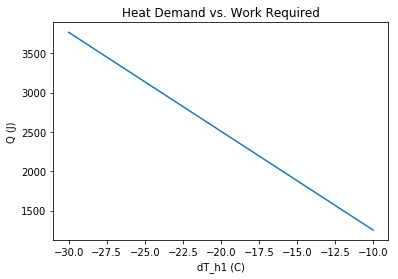

In [135]:
plt.plot(dT_h1, Q)
plt.xlabel("dT_h1 (C)")
plt.ylabel("Q (J)")
plt.title("Heat Demand vs. Work Required")
plt.show()

In [137]:
# House Density
hot_temp = 70 # C

dT_h1 = -20 # C

T1 = hot_temp + dT_h1

r_pipe = 0.04 # m
h_pipe = np.array([20, 60]) # m --> modify length of pipes, add heat losses
k = .005  # W/m*K heat loss coefficient
soiltemp = 35 #C
hl = h_pipe * k * ((hot_temp+273.15) + (T1+273.15) - 2*(soiltemp+273.15)) #W, watts lost
heatloss = hl / 4168

v_water = 3.1415 * r_pipe**2 * h_pipe # m3
rho = 997 # kg/m3
m_water = v_water * rho

cold_temp = (T1) - heatloss # C

cold_temp

print(hot_temp, cold_temp)

70 [49.99880038 49.99640115]


In [138]:
T2 = 48.88 + 273.15 # K
T3 = 30 + 273.15 # K

tpi = T2 # K primary inlet temp, hot, 48 C
tpo = T3 # K primary outlet temp, cold, 30 C
tso = hot_temp + 273.15 # K secondary outlet temp, hot
tsi = cold_temp + 273.15 # K secondary inlet temp, cold

# For counter flow:
dt_i = tpi - tso # inlet primary and outlet secondary fluid temp difference -- 48-50 = -2
dt_o = tpo - tsi # outlet primary and inlet secondary fluid temp difference -- 30-(30/25) = 0 or 5

LMTD = (dt_o - dt_i) / (np.log(dt_o / dt_i))

print(LMTD)

[-20.55430383 -20.55308208]


In [139]:
dt_loop =  hot_temp - cold_temp
print(dt_loop)
Q = 0.03 * c_water * dt_loop

[20.00119962 20.00359885]


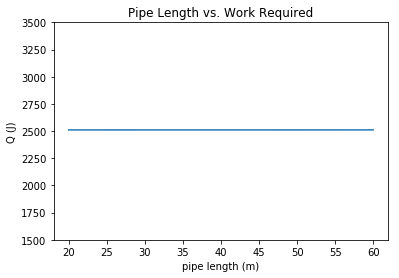

In [141]:
plt.plot(h_pipe, Q)
plt.xlabel("pipe length (m)")
plt.ylabel("Q (J)")
plt.title("Pipe Length vs. Work Required")
plt.ylim((1500, 3500)) 
plt.show()

In [110]:
W12 = ma * (h1 - h2) # W